In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pipe import take_while
from scipy.integrate import solve_ivp

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [3]:
# (tinklo) žingsnis: τ, h
# σ - ta konstanta prie k_n

In [4]:
def RungeKutta4(fn, u0 = 1, lower_bound = 0, upper_bound = 1, tau = 0.1):
  y = [u0]
  ts = np.arange(lower_bound, upper_bound + tau, tau)

  k1 = lambda t_n: fn(t_n,         y[-1])
  k2 = lambda t_n: fn(t_n + tau/2, y[-1] + tau * k1(t_n) / 2)
  k3 = lambda t_n: fn(t_n + tau/2, y[-1] + tau * k2(t_n) / 2)
  k4 = lambda t_n: fn(t_n + tau,   y[-1] + tau * k3(t_n))
  y_n_plus_one = lambda t_n: y[-1] + (tau/6)*(k1(t_n) + 2*k2(t_n) + 2*k3(t_n) + k4(t_n))
  

  for t in ts[1:]:
    y.append(y_n_plus_one(t))
  
  return ts, y

In [5]:
def RungeKutta2(fn, u0 = 1, lower_bound = 0, upper_bound = 1, tau = 0.1):
  y = [u0]
  ts = np.arange(lower_bound, upper_bound + tau, tau)

  k1 = lambda t_n: fn(t_n,         y[-1])
  k2 = lambda t_n: fn(t_n + tau/2, y[-1] + tau * k1(t_n) / 2)
  y_n_plus_one = lambda t_n: y[-1] + (tau/2)*(k1(t_n) + k2(t_n))

  for t in ts[1:]:
    y.append(y_n_plus_one(t))
  
  return ts, y

In [6]:
def SciPy(fn, u0 = 1, lower_bound = 0, upper_bound = 1, tau = 0.1):
  ts = np.arange(lower_bound, upper_bound + tau, tau)
  sol = solve_ivp(f, (lower_bound, upper_bound), [u0], t_eval=ts)
  return ts, sol['y'][0]


In [7]:
# u' = x^2 ln(u+x) − x
f = lambda x, u: np.pow(x, 2) * np.log(u + x) - x

In [8]:
ts1, rk4_ys1 = RungeKutta4(f, tau = 0.05)
ts2, rk4_ys2 = RungeKutta4(f, tau = 0.1)

_, rk2_ys1 = RungeKutta2(f, tau = 0.05)
_, rk2_ys2 = RungeKutta2(f, tau = 0.1)

_, scipy1 = SciPy(f, tau = 0.05)

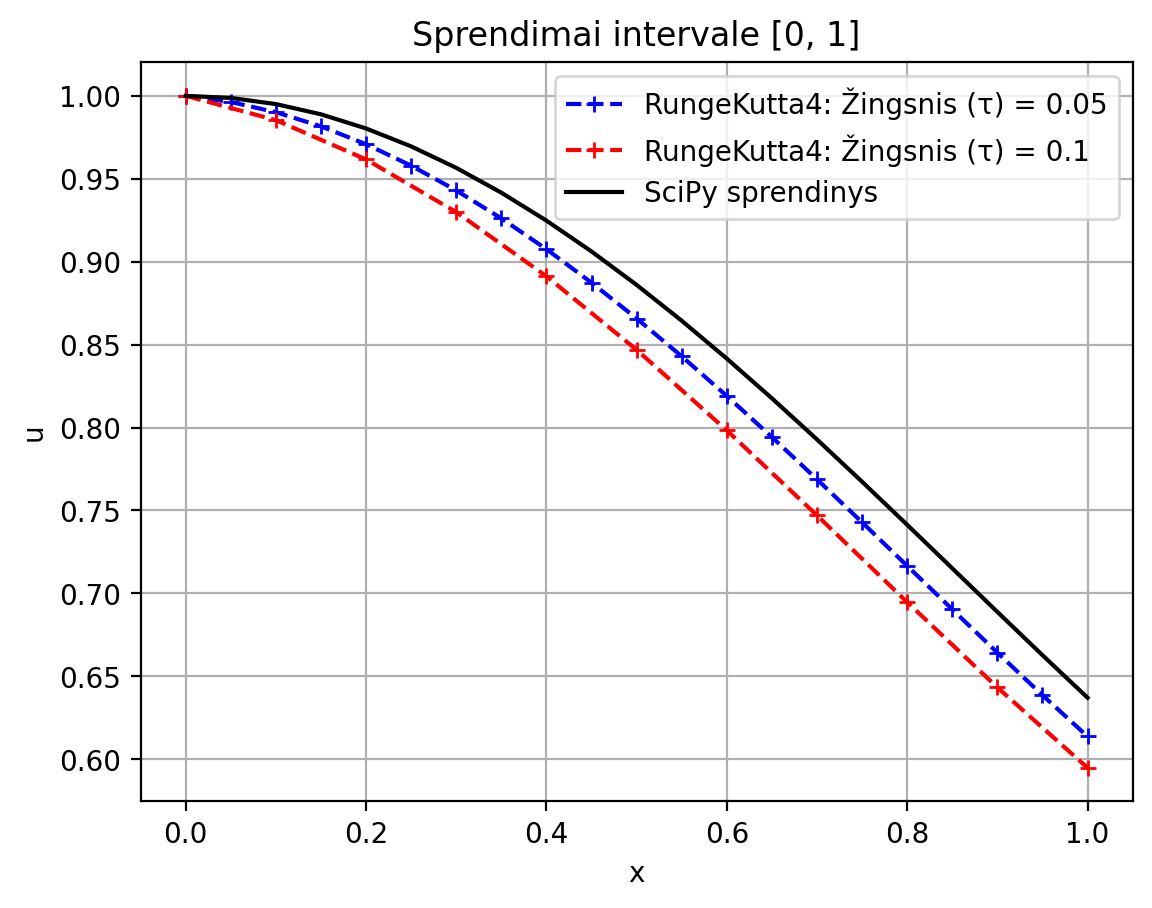

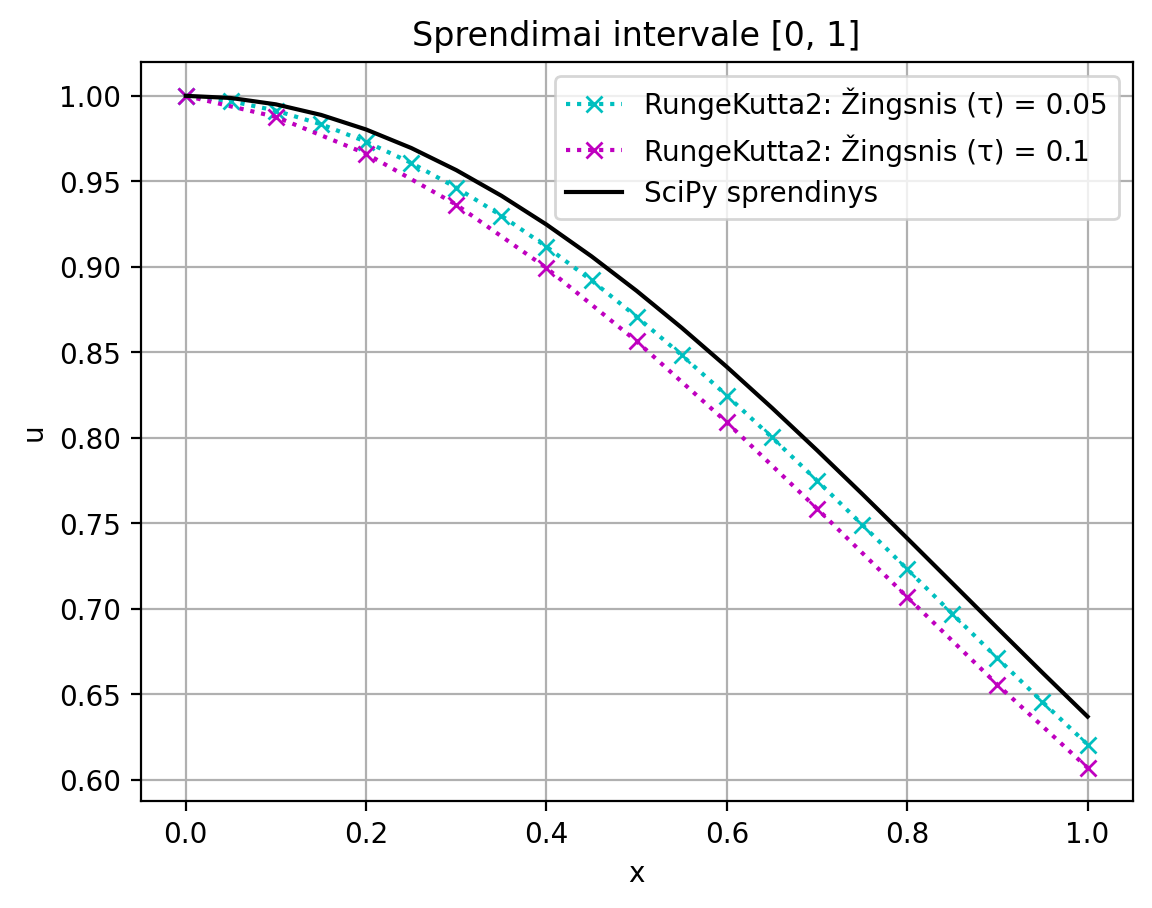

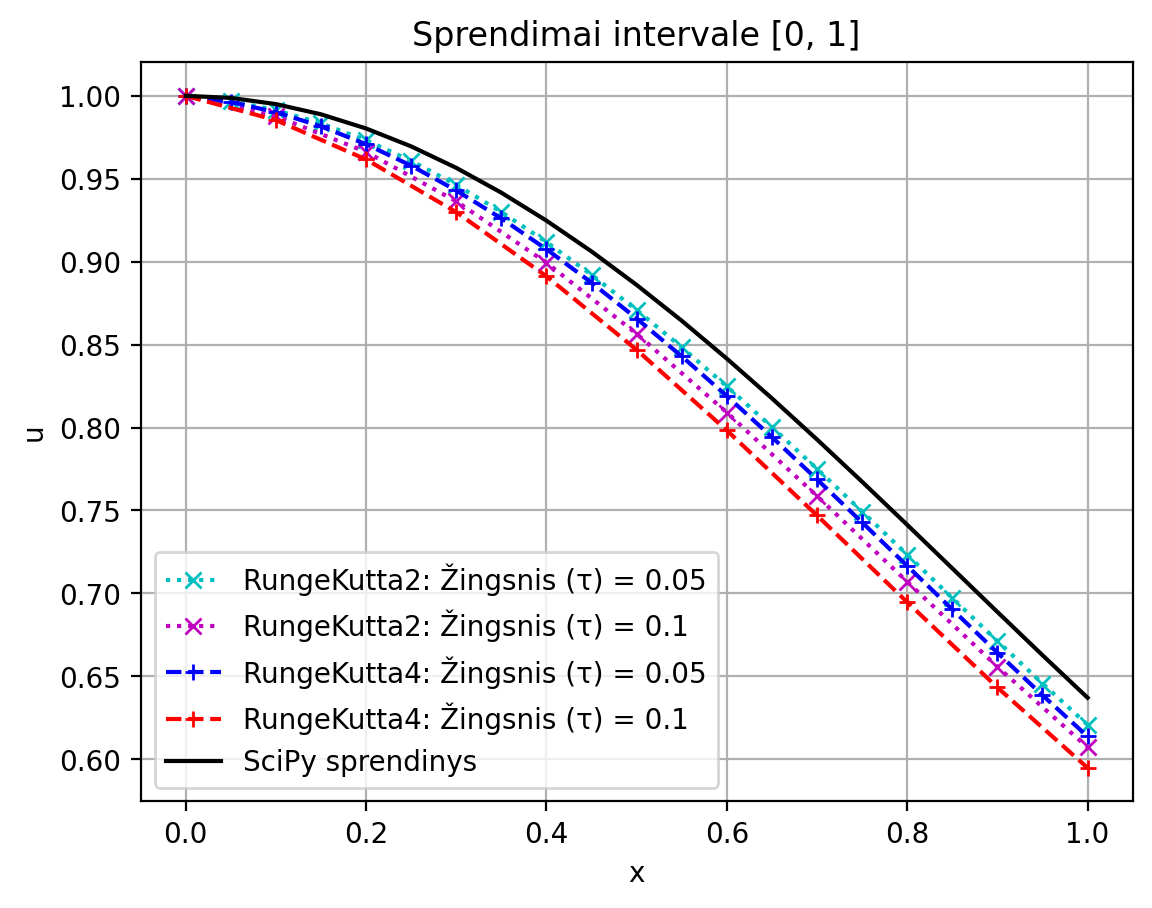

In [9]:
plt.plot(ts1, rk4_ys1, 'b--', marker='+', label='RK4: Žingsnis (τ) = 0.05')
plt.plot(ts2, rk4_ys2, 'r--', marker='+', label='RK4: Žingsnis (τ) = 0.1')
plt.plot(ts1, scipy1, color='black', label='SciPy sprendinys')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Sprendimai intervale [0, 1]')
plt.legend()
plt.grid(True)
plt.savefig('rk4.png', dpi=300)
plt.show()

plt.plot(ts1, rk2_ys1, 'c:', marker='x', label='RK2: Žingsnis (τ) = 0.05')
plt.plot(ts2, rk2_ys2, 'm:', marker='x', label='RK2: Žingsnis (τ) = 0.1')
plt.plot(ts1, scipy1, color='black', label='SciPy sprendinys')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Sprendimai intervale [0, 1]')
plt.legend()
plt.grid(True)
plt.savefig('rk2.png', dpi=300)
plt.show()

plt.plot(ts1, rk2_ys1, 'c:', marker='x', label='RK2: Žingsnis (τ) = 0.05')
plt.plot(ts2, rk2_ys2, 'm:', marker='x', label='RK2: Žingsnis (τ) = 0.1')
plt.plot(ts1, rk4_ys1, 'b--', marker='+', label='RK4: Žingsnis (τ) = 0.05')
plt.plot(ts2, rk4_ys2, 'r--', marker='+', label='RK4: Žingsnis (τ) = 0.1')
plt.plot(ts1, scipy1, color='black', label='SciPy sprendinys')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Sprendimai intervale [0, 1]')
plt.legend()
plt.grid(True)
plt.savefig('all.png', dpi=300)
plt.show()

In [10]:

def error(y_tau, y_2tau, tau = 0.1, order = 2):
  y_tau  = np.array(y_tau)
  y_2tau = np.array(y_2tau[::2])
  return np.abs(y_2tau - y_tau) / (2**order - 1)

In [11]:
rk2_err = error(rk2_ys2, rk2_ys1, order = 2)
rk4_err = error(rk4_ys2, rk4_ys1, order = 4)

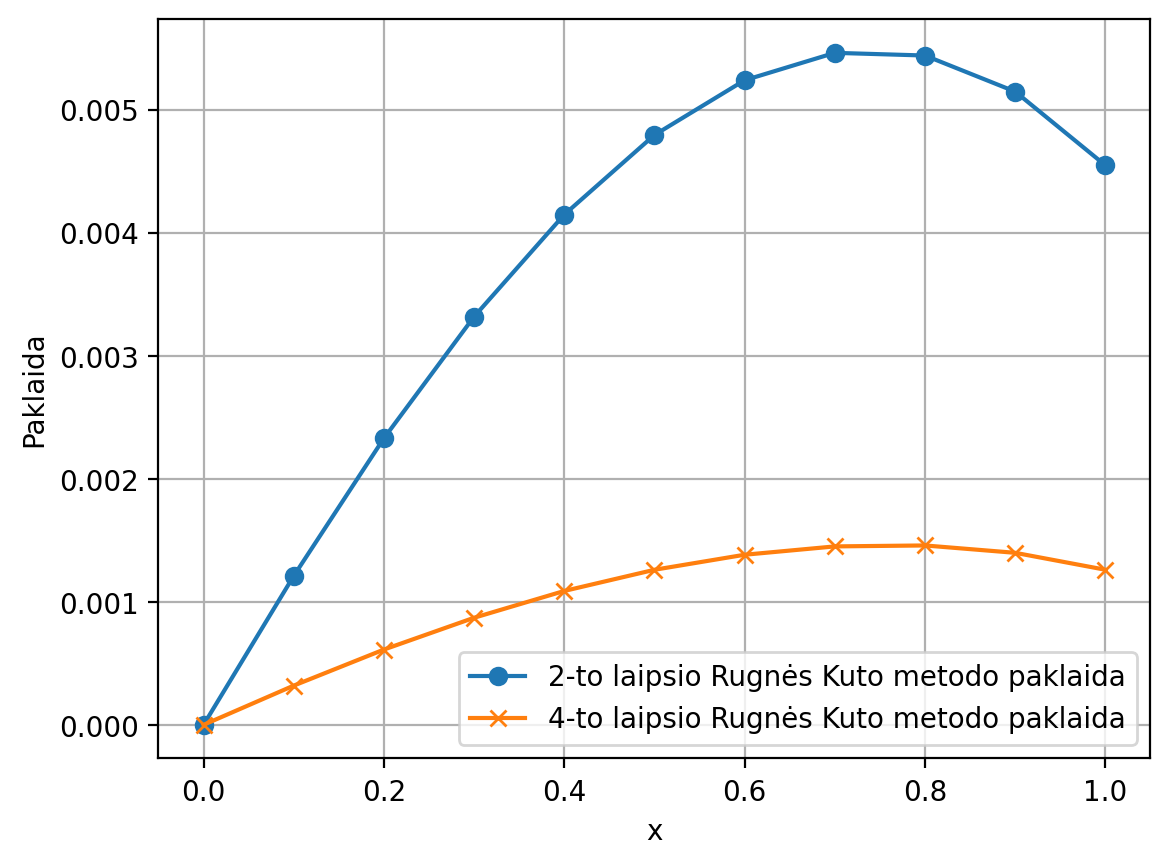

In [12]:
plt.plot(ts2, rk2_err, label='2-to laipsio Rugnės Kuto metodo paklaida', marker='o')
plt.plot(ts2, rk4_err, label='4-to laipsio Rugnės Kuto metodo paklaida', marker='x')

plt.xlabel('x')
plt.ylabel('Paklaida')
plt.legend()
plt.grid(True)
plt.savefig('error.png', dpi=300)
plt.show()